In [1306]:
import pandas as pd
import numpy as np
import codecs as cd

In [1307]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [1308]:
# the commonly used alias for seaborn is sns
import seaborn as sns

# set a seaborn style of your taste
sns.set_style("whitegrid")

In [1309]:
dfTrain=pd.read_csv('train.csv')#import train dataset
dfTest=pd.read_csv('test.csv')#import test dataset

In [1310]:
train_original=dfTrain.copy()
test_original=dfTest.copy()

In [1311]:
train_original.Ticket.head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [1312]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [1313]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import re

%matplotlib inline
rcParams['figure.figsize'] = 10,8

In [1314]:
dfTrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1315]:
#checking relation(mean) between categorical value like Pclass and survived
dfTrain[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [1316]:
#checking relation(mean) between categorical value like Sex and survived
dfTrain[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [1317]:
#checking relation(mean) between categorical value like SibSp and survived
dfTrain[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [1318]:
#checking relation(mean) between categorical value like Parch and survived
dfTrain[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [1319]:
#checking variables correlation
dfTrain.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [1320]:
#Counting number of family and putting it into new column FamilySize
dfTrain['FamilySize']=dfTrain['Parch']+dfTrain['SibSp']
dfTest['FamilySize']=dfTest['Parch']+dfTest['SibSp']

In [1321]:
dfTrain[["FamilySize", "Survived"]].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


In [1322]:
#FamilySize still showing 0 mean values thereof,changing it into another column isAlone
dfTrain['IsAlone'] = 0
dfTrain.loc[dfTrain['FamilySize'] == 1, 'IsAlone'] = 1

In [1323]:
 dfTest['IsAlone'] = 0
dfTest.loc[dfTest['FamilySize'] == 1, 'IsAlone'] = 1

In [1324]:
#Dropping column Parch and SibSp as if have 0 mean value for survived
dfTrain_1=dfTrain.drop(['Parch','SibSp'],axis=1)
dfTest_1=dfTest.drop(['Parch','SibSp'],axis=1)

In [1325]:
#dropping FamilySize column as it is replaced by other column isAlone
#dfTrain_1=dfTrain_1.drop(['FamilySize'],axis=1)
#dfTest_1=dfTest_1.drop(['FamilySize'],axis=1)

In [1326]:
dfTrain_1.iloc[759]

PassengerId                                                  760
Survived                                                       1
Pclass                                                         1
Name           Rothes, the Countess. of (Lucy Noel Martha Dye...
Sex                                                       female
Age                                                           33
Ticket                                                    110152
Fare                                                        86.5
Cabin                                                        B77
Embarked                                                       S
FamilySize                                                     0
IsAlone                                                        0
Name: 759, dtype: object

In [1327]:
dfTrain_1['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [1328]:
dfTrain_1['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

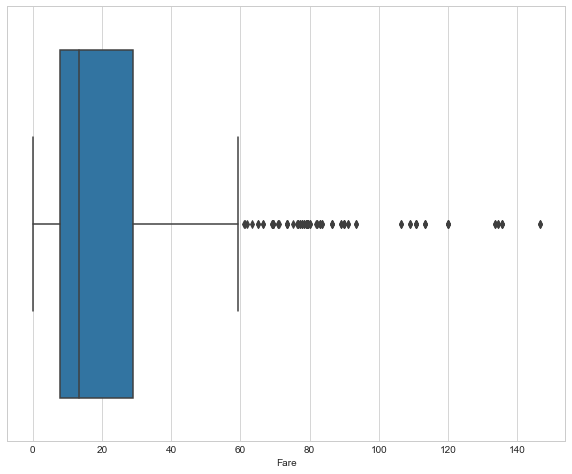

In [1329]:
df_temp = dfTrain_1[(dfTrain_1.Fare < 150)]
sns.boxplot(df_temp['Fare'])
#plt.xscale('log')
plt.show()

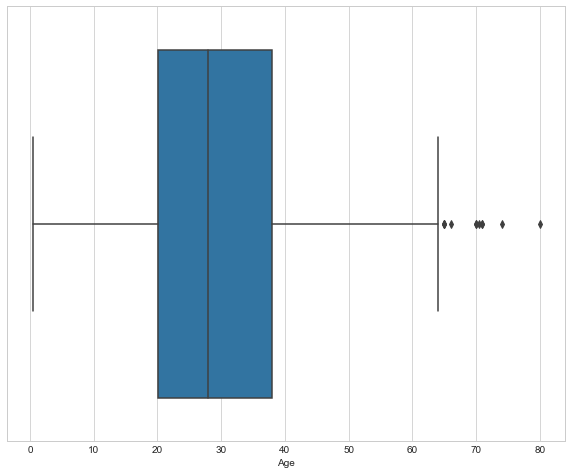

In [1330]:
#df_temp = dfTrain_1[(dfTrain_1.Fare < 150)]
sns.boxplot(dfTrain_1['Age'])
#plt.xscale('log')
plt.show()

In [1331]:
#replacing categoriacal value like Sex into numerical 
dfTrain_2=dfTrain_1.replace({'Sex':{'male':0,'female':1}})
dfTest_2=dfTest_1.replace({'Sex':{'male':0,'female':1}})

In [1332]:
#dfTrain_2

In [1333]:
#Searching title from name
dfTrain_2['Title'] = dfTrain_2.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
dfTest_2['Title'] = dfTest_2.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

In [1334]:
#Title dictionary
Title_Dictionary = {
        "Capt":       "Officer",
        "Col":        "Officer",
        "Major":      "Officer",
        "Dr":         "Officer",
        "Rev":        "Officer",
        "Jonkheer":   "Royalty",
        "Don":        "Royalty",
        "Sir" :       "Royalty",
        "the Countess":"Royalty",
        "Dona":       "Royalty",
        "Lady" :      "Royalty",
        "Mme":        "Mrs",
        "Ms":         "Mrs",
        "Mrs" :       "Mrs",
        "Mlle":       "Miss",
        "Miss" :      "Miss",
        "Mr" :        "Mr",
        "Master" :    "Master"
                   }

In [1335]:
#mapping title with titles in title dictionary
dfTrain_2['Title'] = dfTrain_2.Title.map(Title_Dictionary)
dfTest_2['Title'] = dfTest_2.Title.map(Title_Dictionary)


In [1336]:
dfTrain_2

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,0,Mr
5,6,0,3,"Moran, Mr. James",0,NaN,330877,8.4583,NaN,Q,0,0,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,17463,51.8625,E46,S,0,0,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,349909,21.0750,NaN,S,4,0,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,347742,11.1333,NaN,S,2,0,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,237736,30.0708,NaN,C,1,1,Mrs


In [1337]:
dfTrain_2["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'U' for i in dfTrain_2['Cabin'] ])

In [1338]:
dfTest_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            332 non-null float64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
FamilySize     418 non-null int64
IsAlone        418 non-null int64
Title          418 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [1339]:
dfTest_2["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'U' for i in dfTest_2['Cabin'] ])

In [1340]:
# removing cabin as it is already replaced by Deck
dfTrain__3=dfTrain_2.copy()
dfTest__3=dfTest_2.copy()

In [1341]:
# doing null value analysis
m=100*(dfTrain__3.isnull().sum()/len(dfTrain__3.index))
m.round(2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
Ticket          0.00
Fare            0.00
Cabin           0.00
Embarked        0.22
FamilySize      0.00
IsAlone         0.00
Title           0.11
dtype: float64

In [1342]:
#finding median of age by grouping into class like sex and sub classes like Pclass,Title
#age_group = dfTrain__3.groupby(["Sex","Pclass","Title"])["Age"]

#print(age_group.median())

In [1343]:
train_group = dfTrain__3.loc[dfTrain__3.Age.isnull()]
train_group

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title
5,6,0,3,"Moran, Mr. James",0,NaN,330877,8.4583,U,Q,0,0,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",0,NaN,244373,13.0000,U,S,0,0,Mr
19,20,1,3,"Masselmani, Mrs. Fatima",1,NaN,2649,7.2250,U,C,0,0,Mrs
26,27,0,3,"Emir, Mr. Farred Chehab",0,NaN,2631,7.2250,U,C,0,0,Mr
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,330959,7.8792,U,Q,0,0,Miss
29,30,0,3,"Todoroff, Mr. Lalio",0,NaN,349216,7.8958,U,S,0,0,Mr
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,NaN,PC 17569,146.5208,B,C,1,1,Mrs
32,33,1,3,"Glynn, Miss. Mary Agatha",1,NaN,335677,7.7500,U,Q,0,0,Miss
36,37,1,3,"Mamee, Mr. Hanna",0,NaN,2677,7.2292,U,C,0,0,Mr
42,43,0,3,"Kraeff, Mr. Theodor",0,NaN,349253,7.8958,U,C,0,0,Mr


In [1344]:
dfTrain__3.pivot_table(values = 'Age', index = ['Title'], aggfunc = 'median')

,Age
Title,
Master,3.5
Miss,21.0
Mr,30.0
Mrs,35.0
Officer,50.0
Royalty,44.0


In [1345]:
dfTrain__3.pivot_table(values = 'Age', index = ['Sex','Pclass','Title'], aggfunc = 'median')

Age
Sex Pclass Title        
0   1      Master    4.0
           Mr       40.0
           Officer  51.0
           Royalty  40.0
    2      Master    1.0
           Mr       31.0
           Officer  46.5
    3      Master    4.0
           Mr       26.0
1   1      Miss     30.0
           Mrs      40.0
           Officer  49.0
           Royalty  48.0
    2      Miss     24.0
           Mrs      31.5
    3      Miss     18.0
           Mrs      31.0

In [1346]:
#replacing null values of age with class and sub class wise median
dfTrain__3.loc[dfTrain__3.Age.isnull(), 'Age'] = dfTrain__3.groupby(['Sex','Title']).Age.transform('median')
dfTest__3.loc[dfTest__3.Age.isnull(), 'Age'] = dfTest__3.groupby(['Sex','Title']).Age.transform('median')

In [1347]:
#doing again null value analysis and finding that there is no null value for Age
m=100*(dfTrain__3.isnull().sum()/len(dfTrain__3.index))
m.round(2)

PassengerId    0.00
Survived       0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.00
Ticket         0.00
Fare           0.00
Cabin          0.00
Embarked       0.22
FamilySize     0.00
IsAlone        0.00
Title          0.11
dtype: float64

In [1348]:
#dropping Name as we have column title that would be neccesary for general analysis not the name
dfTrain_4=dfTrain__3.drop(['Name'],axis=1)
dfTest_4=dfTest__3.drop(['Name'],axis=1)

In [1349]:
bins=[0,5,15,25,60,81]
dfTrain_4['Age_bin']=pd.cut(dfTrain_4['Age'],bins).tolist()
dfTest_4['Age_bin']=pd.cut(dfTest_4['Age'],bins).tolist()

In [1350]:
#imputing null values of Embarked with most frequent value
dfTrain_4['Embarked'].fillna(dfTrain_4['Embarked'].mode()[0], inplace=True)
dfTest_4['Embarked'].fillna(dfTest_4['Embarked'].mode()[0], inplace=True)

In [1351]:
#dfTrain_4["Fare"] = np.log1p(dfTrain_4["Fare"])

In [1352]:
#dfTest_4["Fare"] = np.log1p(dfTest_4["Fare"])

In [1353]:
farebins=[-1,8,15,31,550]
dfTrain_4['Fare_bin']=pd.cut(dfTrain_4['Fare'],farebins).tolist()
dfTest_4['Fare_bin']=pd.cut(dfTest_4['Fare'],farebins).tolist()

In [1354]:
dfTrain_4.pivot_table(values = 'PassengerId', index = 'Age_bin', aggfunc = 'count')

,PassengerId
Age_bin,
"(0, 5]",48
"(5, 15]",39
"(15, 25]",254
"(25, 60]",528
"(60, 81]",22


In [1355]:
dfTrain_4

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,Age_bin,Fare_bin
0,1,0,3,0,22.0,A/5 21171,7.2500,U,S,1,1,Mr,"(15, 25]","(-1, 8]"
1,2,1,1,1,38.0,PC 17599,71.2833,C,C,1,1,Mrs,"(25, 60]","(31, 550]"
2,3,1,3,1,26.0,STON/O2. 3101282,7.9250,U,S,0,0,Miss,"(25, 60]","(-1, 8]"
3,4,1,1,1,35.0,113803,53.1000,C,S,1,1,Mrs,"(25, 60]","(31, 550]"
4,5,0,3,0,35.0,373450,8.0500,U,S,0,0,Mr,"(25, 60]","(8, 15]"
5,6,0,3,0,30.0,330877,8.4583,U,Q,0,0,Mr,"(25, 60]","(8, 15]"
6,7,0,1,0,54.0,17463,51.8625,E,S,0,0,Mr,"(25, 60]","(31, 550]"
7,8,0,3,0,2.0,349909,21.0750,U,S,4,0,Master,"(0, 5]","(15, 31]"
8,9,1,3,1,27.0,347742,11.1333,U,S,2,0,Mrs,"(25, 60]","(8, 15]"
9,10,1,2,1,14.0,237736,30.0708,U,C,1,1,Mrs,"(5, 15]","(15, 31]"


In [1356]:
fare_bin=pd.crosstab(dfTrain_4['Fare_bin'],dfTrain_4['Survived'],dropna = True)
fare_bin

Survived,0,1
Fare_bin,,
"(-1, 8]",189,52
"(8, 15]",155,62
"(15, 31]",112,99
"(31, 550]",93,129


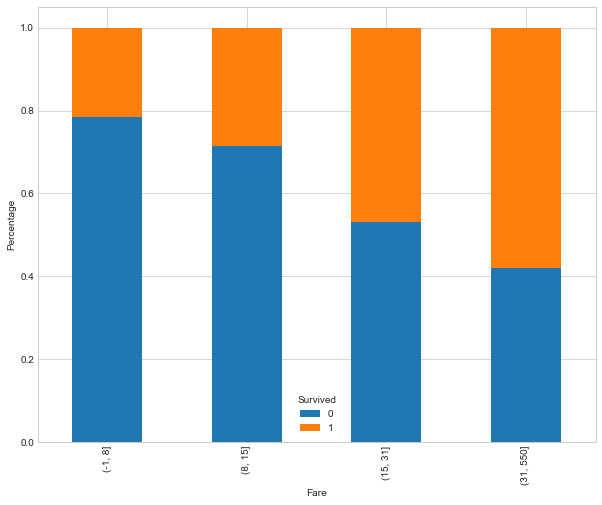

In [1357]:
fare_bin=pd.crosstab(dfTrain_4['Fare_bin'],dfTrain_4['Survived'],dropna = True)
fare_bin.div(fare_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Fare')
P = plt.ylabel('Percentage')

In [1358]:
m=100*(dfTrain_4.isnull().sum()/len(dfTrain_4.index))
m.round(2)

PassengerId    0.00
Survived       0.00
Pclass         0.00
Sex            0.00
Age            0.00
Ticket         0.00
Fare           0.00
Cabin          0.00
Embarked       0.00
FamilySize     0.00
IsAlone        0.00
Title          0.11
Age_bin        0.00
Fare_bin       0.00
dtype: float64

In [1359]:
dfTrain_4[dfTrain_4.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,Age_bin,Fare_bin
759,760,1,1,1,33.0,110152,86.5,B,S,0,0,NaN,"(25, 60]","(31, 550]"


In [1360]:
dfTrain_4.loc[pd.isnull(dfTrain_4['Title']), ['Title']] = 'Miss'

In [1361]:
dfTrain_4[dfTrain_4.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,Age_bin,Fare_bin


In [1362]:
#Replacing null values of title with 0
dfTrain_4['Title'] = dfTrain_4['Title'].fillna(0)
dfTest_4['Title'] = dfTest_4['Title'].fillna(0)

In [1363]:
#doing null analysis and getting clean data as result
m=100*(dfTrain_4.isnull().sum()/len(dfTrain_4.index))
m.round(2)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Sex            0.0
Age            0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
FamilySize     0.0
IsAlone        0.0
Title          0.0
Age_bin        0.0
Fare_bin       0.0
dtype: float64

In [1364]:
dfTest_4.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Ticket         0
Fare           1
Cabin          0
Embarked       0
FamilySize     0
IsAlone        0
Title          0
Age_bin        0
Fare_bin       1
dtype: int64

In [1365]:
#doing null analysis for test dataset
m=100*(dfTest_4.isnull().sum()/len(dfTest_4.index))
m.round(2)

PassengerId    0.00
Pclass         0.00
Sex            0.00
Age            0.00
Ticket         0.00
Fare           0.24
Cabin          0.00
Embarked       0.00
FamilySize     0.00
IsAlone        0.00
Title          0.00
Age_bin        0.00
Fare_bin       0.24
dtype: float64

In [1366]:
dfTest_4[dfTest_4.isnull().any(axis=1)]

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,Age_bin,Fare_bin
152,1044,3,0,60.5,3701,NaN,U,S,0,0,Mr,"(60, 81]",NaN


In [1367]:
#replacing null value of fare with 0 as they can be crew member or special category people
dfTest_4.loc[dfTest_4.Fare.isnull(), 'Fare'] = dfTest_4.groupby(['Sex','Pclass','Title']).Fare.transform('median')
dfTest_4['Fare_bin']=pd.cut(dfTest_4['Fare'],farebins).tolist()
#dfTest5['Fare']=dfTest5['Fare'].fillna(0)

In [1368]:
dfTest_4[dfTest_4.isnull().any(axis=1)]

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,Age_bin,Fare_bin


In [1369]:
dfTrain_4[dfTrain_4.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,Age_bin,Fare_bin


In [1370]:
dfTrain5=dfTrain_4.drop(['PassengerId','Fare','Age','FamilySize'],axis=1)
dfTest5=dfTest_4.drop(['PassengerId','Fare','Age','FamilySize'],axis=1)

In [1371]:
Ticket = []
for i in list(dfTrain5.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0])
    else:
        Ticket.append("U")
        
dfTrain5["Ticket"] = Ticket
dfTrain5["Ticket"]=dfTrain5["Ticket"].str.upper()
dfTrain5["Ticket"].unique()

#dfTrain5 = pd.get_dummies(dfTrain5, columns = ["Ticket"], prefix="T")


array(['A5', 'PC', 'STONO2', 'U', 'PP', 'CA', 'SCPARIS', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SOP', 'FA',
       'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH', 'AS', 'SOPP',
       'FC', 'SOTONO2', 'CASOTON'], dtype=object)

In [1372]:
#dfTrain5

In [1373]:
Ticket = []
for i in list(dfTest5.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0])
    else:
        Ticket.append("U")
        
dfTest5["Ticket"] = Ticket
dfTest5["Ticket"]=dfTest5["Ticket"].str.upper()
dfTest5["Ticket"].unique()

#dfTest5 = pd.get_dummies(dfTest5, columns = ["Ticket"], prefix="T")

array(['U', 'A4', 'WEP', 'SCPARIS', 'STONO2', 'PC', 'C', 'A5', 'SCAH',
       'CA', 'WC', 'SOTONOQ', 'STONO', 'SCA3', 'FCC', 'FC', 'PP',
       'STONOQ', 'SCA4', 'SOPP', 'SOC', 'SOTONO2', 'AQ4', 'A', 'SC', 'LP',
       'AQ3'], dtype=object)

In [1374]:
#again doing null analysis and getting clean data
m=100*(dfTest5.isnull().sum()/len(dfTest5.index))
m.round(2)

Pclass      0.0
Sex         0.0
Ticket      0.0
Cabin       0.0
Embarked    0.0
IsAlone     0.0
Title       0.0
Age_bin     0.0
Fare_bin    0.0
dtype: float64

In [1375]:
train=pd.get_dummies(dfTrain5)
test=pd.get_dummies(dfTest5)


In [1376]:
missing_cols = set( train.columns ) - set( test.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
test = test[train.columns]

In [1381]:
#making variables to train and test the model
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop(['Survived'],axis=1)
X_train.shape, Y_train.shape, X_test.shape

((891, 60), (891L,), (418, 60))

In [1382]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 60 columns):
Pclass                891 non-null int64
Sex                   891 non-null int64
IsAlone               891 non-null int64
Ticket_A4             891 non-null uint8
Ticket_A5             891 non-null uint8
Ticket_AS             891 non-null uint8
Ticket_C              891 non-null uint8
Ticket_CA             891 non-null uint8
Ticket_CASOTON        891 non-null uint8
Ticket_FA             891 non-null uint8
Ticket_FC             891 non-null uint8
Ticket_FCC            891 non-null uint8
Ticket_LINE           891 non-null uint8
Ticket_PC             891 non-null uint8
Ticket_PP             891 non-null uint8
Ticket_PPP            891 non-null uint8
Ticket_SC             891 non-null uint8
Ticket_SCA4           891 non-null uint8
Ticket_SCAH           891 non-null uint8
Ticket_SCOW           891 non-null uint8
Ticket_SCPARIS        891 non-null uint8
Ticket_SOC            891 non-null

In [1379]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 61 columns):
Survived              418 non-null int64
Pclass                418 non-null int64
Sex                   418 non-null int64
IsAlone               418 non-null int64
Ticket_A4             418 non-null uint8
Ticket_A5             418 non-null uint8
Ticket_AS             418 non-null int64
Ticket_C              418 non-null uint8
Ticket_CA             418 non-null uint8
Ticket_CASOTON        418 non-null int64
Ticket_FA             418 non-null int64
Ticket_FC             418 non-null uint8
Ticket_FCC            418 non-null uint8
Ticket_LINE           418 non-null int64
Ticket_PC             418 non-null uint8
Ticket_PP             418 non-null uint8
Ticket_PPP            418 non-null int64
Ticket_SC             418 non-null uint8
Ticket_SCA4           418 non-null uint8
Ticket_SCAH           418 non-null uint8
Ticket_SCOW           418 non-null int64
Ticket_SCPARIS        418 non-null

In [1383]:
#applying logistic regression model
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
acc_log = round(model.score(X_train, Y_train) * 100, 2)
acc_log

83.16

In [1384]:
Y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [1386]:
submission['Survived']=Y_pred
submission['PassengerId']=test_original['PassengerId']

In [1387]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [1388]:
pd.DataFrame(submission, columns=['PassengerId','Survived']).to_csv('logisticV6.csv', index=False)

In [1389]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred1 = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

91.58

In [1390]:
submissionr['Survived']=Y_pred1
submissionr['PassengerId']=test_original['PassengerId']

In [1391]:
submissionr

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [1392]:
pd.DataFrame(submissionr, columns=['PassengerId','Survived']).to_csv('rfv6.csv', index=False)

In [1393]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred1 = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

91.58

In [ ]:
k